# Aditya Nagdiya_ Hackathon_ Health Insurance Lead Prediction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv("train_Df64byy.csv")
test = pd.read_csv("test_YCcRUnU.csv")

In [3]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
train.shape,          test.shape

((50882, 14), (21805, 13))

- *there are 50882 rows and 14 columns in Train set, whereas in Test set  21805 rows and 13 columns*
***

### Exploratory Data Analysis:

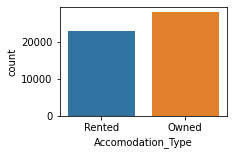

In [5]:
plt.figure(figsize=(3,2))
sns.countplot('Accomodation_Type',data=train)
plt.show()

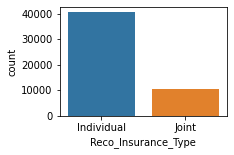

In [6]:
plt.figure(figsize=(3,2))
sns.countplot('Reco_Insurance_Type',data=train)
plt.show()

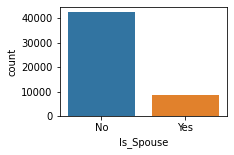

In [7]:
plt.figure(figsize=(3,2))
sns.countplot('Is_Spouse',data=train)
plt.show()

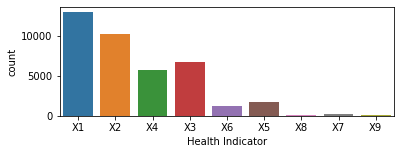

In [8]:
plt.figure(figsize=(6,2))
sns.countplot('Health Indicator',data=train)
plt.show()

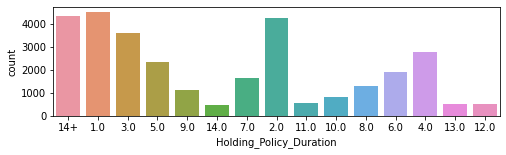

In [9]:
plt.figure(figsize=(8,2))
sns.countplot('Holding_Policy_Duration',data=train)
plt.show()

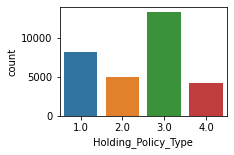

In [10]:
plt.figure(figsize=(3,2))
sns.countplot('Holding_Policy_Type',data=train)
plt.show()

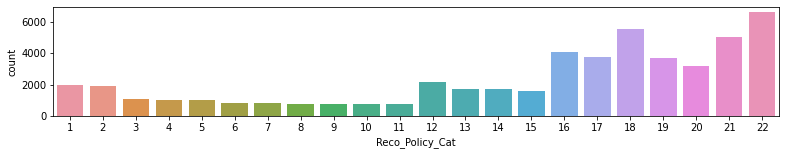

In [11]:
plt.figure(figsize=(13,2))
sns.countplot('Reco_Policy_Cat',data=train)
plt.show()

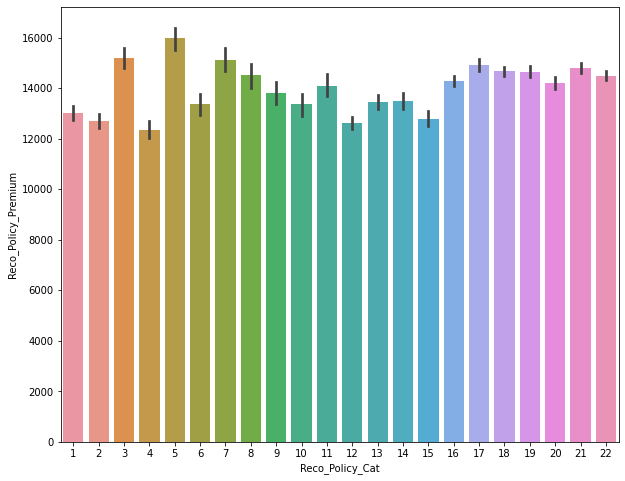

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x='Reco_Policy_Cat',y='Reco_Policy_Premium',data=train)
plt.show()

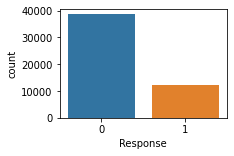

In [13]:
plt.figure(figsize=(3,2))
sns.countplot('Response',data=train, )
plt.show()

In [14]:
frq=train['Response'].value_counts()

Not_Interested=frq[0]/(frq[0]+frq[1])*100
print("Customer did not show interest in the recommended policy: {:.2f} %".format(Not_Interested))

Interested=frq[1]/(frq[0]+frq[1])*100
print("Customer showed interest in the recommended policy:      {:.2f} %".format(Interested))

Customer did not show interest in the recommended policy: 76.01 %
Customer showed interest in the recommended policy:      23.99 %


##### : So , Imbalance Data

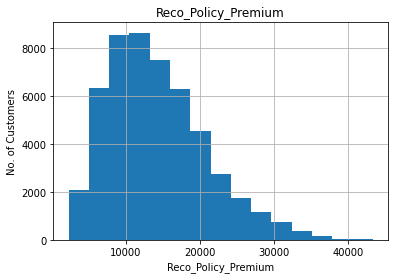

In [15]:
train.hist('Reco_Policy_Premium', bins = 15)
plt.xlabel('Reco_Policy_Premium')
plt.ylabel('No. of Customers')
plt.show()

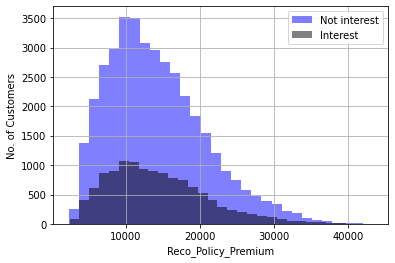

In [16]:
train[train['Response']==0]['Reco_Policy_Premium'].hist(alpha=.5,color='blue',bins=30,label='Not interest')
train[train['Response']==1]['Reco_Policy_Premium'].hist(alpha=.5,color='k',bins=30,label='Interest')
plt.legend()
plt.xlabel('Reco_Policy_Premium')
plt.ylabel('No. of Customers')
plt.show()

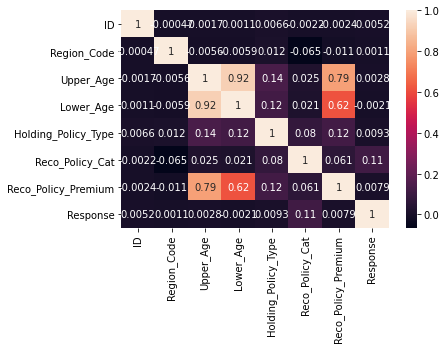

In [17]:
sns.heatmap(train.corr(),annot=True)
plt.show()

### Dropping Some Columns:

In [18]:
train.drop(['ID','City_Code','Region_Code','Lower_Age'],axis=1,inplace=True)
test.drop(['ID','City_Code','Region_Code','Lower_Age'],axis=1,inplace=True)

In [19]:
train.head(2)

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,No,X1,14+,3.0,22,11628.0,0
1,Owned,Joint,75,No,X2,NaN,NaN,22,30510.0,0


### Missing Values:

In [20]:
train.isna().sum()

Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

### Already Not Holding Any Policy: replace NA by 0:

In [21]:
#Imputing with 0
train['Holding_Policy_Duration']= train['Holding_Policy_Duration'].fillna(0)
test['Holding_Policy_Duration']= test['Holding_Policy_Duration'].fillna(0)

In [22]:
#Imputing with 0
train['Holding_Policy_Type']= train['Holding_Policy_Type'].fillna(0)
test['Holding_Policy_Type']= test['Holding_Policy_Type'].fillna(0)

### Replacing '14+' in "Holding_Policy_Duration" by 15, and Converting it to Numeric Type:

In [23]:
train.loc[train.Holding_Policy_Duration == '14+',"Holding_Policy_Duration"] =15
train.Holding_Policy_Duration = pd.to_numeric(train.Holding_Policy_Duration)

test.loc[test.Holding_Policy_Duration == '14+',"Holding_Policy_Duration"] =15
test.Holding_Policy_Duration = pd.to_numeric(test.Holding_Policy_Duration)

### Convert 'Upper_Age' into a category of 4 groups 'Age_bins':

In [24]:
train['Age_bins']=pd.cut(train['Upper_Age'],[0,28,44,60,100],labels=[1,2,3,4])
train.drop(['Upper_Age'],axis=1,inplace=True)

In [25]:
test['Age_bins']=pd.cut(test['Upper_Age'],[0,28,44,60,100],labels=[1,2,3,4])
test.drop(['Upper_Age'],axis=1,inplace=True)

### Convert 'Reco_Policy_Premium' into a category of 6 groups 'Reco_Policy_Premium_bins':

In [26]:
train['Reco_Policy_Premium_bins']=pd.cut(train['Reco_Policy_Premium'],[0,5000,10000,15000,20000,25000,50000],labels=[1,2,3,4,5,6])
train.drop(['Reco_Policy_Premium'],axis=1,inplace=True)

In [27]:
test['Reco_Policy_Premium_bins']=pd.cut(test['Reco_Policy_Premium'],[0,5000,10000,15000,20000,25000,50000],labels=[1,2,3,4,5,6])
test.drop(['Reco_Policy_Premium'],axis=1,inplace=True)

### Seperate Features and Target:

In [28]:
X= train.drop(columns = ['Response'], axis=1)
y= train['Response']

In [29]:
X.head(2)

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Age_bins,Reco_Policy_Premium_bins
0,Rented,Individual,No,X1,15.0,3.0,22,2,3
1,Owned,Joint,No,X2,0.0,0.0,22,4,6


### category_encoders:
On Ordinal Categorical columns and with High Cardinality

In [30]:
from category_encoders import TargetEncoder

In [31]:
enc = TargetEncoder(cols=['Health Indicator','Holding_Policy_Type','Reco_Policy_Cat'])

In [32]:
X = enc.fit_transform(X, y)

In [33]:
test = enc.transform(test)

In [34]:
X.head(2)

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Age_bins,Reco_Policy_Premium_bins
0,Rented,Individual,No,0.244120,15.0,0.242262,0.328385,2,3
1,Owned,Joint,No,0.241096,0.0,0.238951,0.328385,4,6


In [35]:
X.isna().sum().sum()

0

### Labelencoding:

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
var_mod =X.columns

In [38]:
for i in var_mod:
    X[i] = le.fit_transform(X[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

### One Hot Coding:
On Nominal Categorical column , with Low Cardinality

In [39]:
X = pd.get_dummies(X, columns=['Holding_Policy_Type'],drop_first=True)

test = pd.get_dummies(test, columns=['Holding_Policy_Type'],drop_first=True)

In [40]:
X.shape   ,  test.shape 

((50882, 12), (21805, 12))

In [41]:
X.head(2)

,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Age_bins,Reco_Policy_Premium_bins,Holding_Policy_Type_1,Holding_Policy_Type_2,Holding_Policy_Type_3,Holding_Policy_Type_4
0,1,0,0,8,15,20,1,2,0,0,1,0
1,0,1,0,6,0,20,3,5,0,1,0,0


### Applying Oversampling and Undersampling:

In [42]:
from collections import Counter

print(f"Oversampled: {Counter(y)}")

Oversampled: Counter({0: 38673, 1: 12209})


In [43]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.9)

# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)

from collections import Counter

print(f"Oversampled: {Counter(y_over)}")

Oversampled: Counter({0: 38673, 1: 34805})


In [44]:
# now to comine under sampling 
under = RandomUnderSampler(sampling_strategy=0.9)

X, y = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y)}")

Combined Random Sampling: Counter({0: 38672, 1: 34805})


### 20% data as validation set:

In [45]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22, stratify= y)

In [46]:
X_train.shape , X_valid.shape, y_train.shape ,y_valid.shape

((58781, 12), (14696, 12), (58781,), (14696,))

***
### Building a Model:

### LogisticRegression:

In [199]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()

In [200]:
logR.fit(X_train,y_train)

LogisticRegression()

In [201]:
predicted_logR=logR.predict(X_valid)

In [202]:
confusion_matrix(y_valid,predicted_logR)

array([[5011, 2724],
       [3347, 3614]], dtype=int64)

In [203]:
accuracy_score(y_valid,predicted_logR)

0.5868943930321175

In [204]:
print(classification_report(y_valid,predicted_logR))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62      7735
           1       0.57      0.52      0.54      6961

    accuracy                           0.59     14696
   macro avg       0.58      0.58      0.58     14696
weighted avg       0.59      0.59      0.59     14696



### XgBoost with Cross Validation:

In [190]:
from xgboost import XGBClassifier
modelXgb = XGBClassifier()

In [191]:
modelXgb.fit(X_train, y_train)

[16:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5)

In [193]:
resultsXgb = model_selection.cross_val_score(modelXgb,X_train,y_train,cv=kfold)

[16:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [194]:
resultsXgb.mean()

0.6330106570262861

In [195]:
predicted_Xgb=modelXgb.predict(X_valid)

In [196]:
confusion_matrix(y_valid,predicted_Xgb)

array([[4899, 2836],
       [2412, 4549]], dtype=int64)

In [197]:
accuracy_score(y_valid,predicted_Xgb)

0.6428960261295591

In [198]:
print(classification_report(y_valid,predicted_Xgb))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      7735
           1       0.62      0.65      0.63      6961

    accuracy                           0.64     14696
   macro avg       0.64      0.64      0.64     14696
weighted avg       0.64      0.64      0.64     14696



### RandomForestClassifier:

In [47]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier()

In [48]:
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
predicted_RF=modelRF.predict(X_valid)

In [50]:
confusion_matrix(y_valid,predicted_RF)

array([[5459, 2276],
       [1431, 5530]], dtype=int64)

In [51]:
accuracy_score(y_valid,predicted_RF)

0.7477544910179641

In [52]:
print(classification_report(y_valid,predicted_RF))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      7735
           1       0.71      0.79      0.75      6961

    accuracy                           0.75     14696
   macro avg       0.75      0.75      0.75     14696
weighted avg       0.75      0.75      0.75     14696



# ANN1:

In [205]:
X_train.shape, y_train.shape,test.shape

((58781, 12), (58781,), (21805, 12))

In [206]:
import tensorflow as tf
from tensorflow import keras

In [207]:
modelANNFinal = keras.models.Sequential(
    [
        keras.layers.Dense(60,input_shape=X_train.shape[1:],activation="relu"),
        keras.layers.Dense(60, activation="relu"),
        keras.layers.Dense(60, activation="relu"),
        keras.layers.Dropout(rate=0.1),
        keras.layers.Dense(60, activation="relu"),
        keras.layers.Dense(60, activation="relu"),
        keras.layers.Dense(60, activation="relu"),
        keras.layers.Dense(60, activation="relu"),
        keras.layers.Dropout(rate=0.1),
        keras.layers.Dense(60, activation="relu"),
        keras.layers.Dense(60, activation="relu"),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ]
)

In [208]:
modelANNFinal.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [209]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [210]:
history=modelANNFinal.fit(X_train, y_train, batch_size = 30, epochs=100, validation_data=(X_valid,y_valid), callbacks=[early_stopping_cb])

Epoch 1/100
1960/1960 [==============================] - 3s 1ms/step - loss: 0.6668 - accuracy: 0.5718 - val_loss: 0.6613 - val_accuracy: 0.5824
Epoch 2/100
1960/1960 [==============================] - 2s 1ms/step - loss: 0.6617 - accuracy: 0.5823 - val_loss: 0.6636 - val_accuracy: 0.5761
Epoch 3/100
1960/1960 [==============================] - 2s 1ms/step - loss: 0.6602 - accuracy: 0.5818 - val_loss: 0.6600 - val_accuracy: 0.5785
Epoch 4/100
1960/1960 [==============================] - 2s 1ms/step - loss: 0.6588 - accuracy: 0.5842 - val_loss: 0.6565 - val_accuracy: 0.5873
Epoch 5/100
1960/1960 [==============================] - 2s 1ms/step - loss: 0.6570 - accuracy: 0.5875 - val_loss: 0.6551 - val_accuracy: 0.5921
Epoch 6/100
1960/1960 [==============================] - 2s 1ms/step - loss: 0.6566 - accuracy: 0.5880 - val_loss: 0.6543 - val_accuracy: 0.5883
Epoch 7/100
1960/1960 [==============================] - 3s 1ms/step - loss: 0.6555 - accuracy: 0.5876 - val_loss: 0.6627 - val_ac

In [211]:
predicted_ANN = modelANNFinal.predict(X_valid)
predicted_ANN = predicted_ANN.round()

In [212]:
confusion_matrix(y_valid,predicted_ANN)

array([[4638, 3097],
       [2702, 4259]], dtype=int64)

In [213]:
accuracy_score(y_valid,predicted_ANN)

0.6054028307022319

In [214]:
print(classification_report(y_valid,predicted_ANN))

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      7735
           1       0.58      0.61      0.59      6961

    accuracy                           0.61     14696
   macro avg       0.61      0.61      0.61     14696
weighted avg       0.61      0.61      0.61     14696



***
### Submission:

In [53]:
submission = pd.read_csv('sample_submission_QrCyCoT.csv')

As RandomForest Performed Best:

In [54]:
final_predictions = modelRF.predict(test)

In [55]:
submission['Response'] = final_predictions

In [56]:
submission.to_csv('24my_submission.csv', index=False)